In [1]:
from IPython.display import display, HTML, Javascript

def f():
    return HTML("""
    <style>
        @font-face {
            /* تعریف نام فونت */
            font-family: 'BZar';
            /* اکسپلورر 9 به بعد */
            src: url('font/BZar.eot');
            /* بررسی نصب بودن فونت در سیستم کاربر */
            src: local('bZar'),
                 /* برای برخی از مرورگرها مانند سافاری */
                 local('b Zar'),
                 /* هک برای اکسپلورر 8 و ماقبل */
                 url('font/BZar.eot?#iefix') format('embedded-opentype'),
                 /* فرمت مناسب مرورگرهای خیلی جدید */
                 url('font/BZar.woff2') format('woff2'),
                 /* فرمت مناسب مرورگرهای تقریبا جدید */
                 url('font/BZar.woff') format('woff'),
                 /* تمام مرورگرها به جزء اکسپلورر */
                 url('font/BZar.ttf') format('truetype'),
                 /* نسخه‌های قدیمی سیستم عامل iOS */
                 url('font/BZar.svg#BZar') format('svg');
            font-style: normal;
            font-weight: normal;
            font-display: swap;
        }
    
    
        .reveal .slides {
            direction: rtl;
            text-align: right;
        }
        
        div {
            direction: ltr;
            text-align: left;
        }
        
        p > img {
          display: block;
          margin-left: auto;
          margin-right: auto;
          max-width:75%; 
          height:auto;
        }
        
        div.text_cell_render.rendered_html > *, li > p, .rendered_html p, #quarto-document-content > *
        {
            direction: rtl;
            text-align: right;
            font-family: BZar, Tahoma, Geneva, sans-serif;
            font-size: x-large;
            line-height: 26pt;
        }
        
        .jp-CodeMirrorEditor .jp-Editor .jp-InputArea-editor {
            direction: rtl !important;
        }
        
        .CodeMirror-lines .output_subarea .output_text .output_stream .output_stdout{
            direction: ltr !important;
        }
    </style>
    """)

f()

In [2]:
from IPython.display import display, HTML, Javascript

def g():
    return HTML("""
    <link rel="stylesheet" href="css/jquery.jqZoom.css" />
    <script src="js/jquery-1.12.4.min.js"></script>
    <script src="js/jquery.zoom.min.js"></script>
    <script>
        $(document).ready(function(){
            $("img").children().off();
            $('img')
            .wrap('<span style="display:inline-block"></span>')
            .css('display', 'block')
            .parent()
            .zoom({ on:'grab', duration: 150, magnify: 1 });
        });
    </script>
    """)

g()

<div dir=rtl>

# شروع به کار با شبکه‌های عصبی: دسته‌بندی و رگرسیون

## مقدمه

- این فصل موارد زیر را پوشش می‌دهد
    - اولین نمونه‌های شما از گردش کار یادگیری ماشین در دنیای واقعی
    - رسیدگی به مسائل طبقه بندی بر روی داده‌های برداری
    - مدیریت مسائل رگرسیون پیوسته بر روی داده‌های برداری

- در این فصل ۳ شبکه عصبی برای کاربردهای واقعی ساخته می‌شود:
    - طبقه بندی نقدهای فیلم به مثبت یا منفی (طبقه بندی باینری)
    - طبقه بندی متن‌های خبری بر اساس موضوع (طبقه بندی چند طبقه ای)
    - تخمین قیمت یک خانه با توجه به داده‌های املاک (رگرسیون اسکالر)

- در ضمن بحث با موارد زیر آشنا می‌شوید:
    - پیش‌پردازش داده‌ها
    - اصول اولیه معماری مدل
    - ارزیابی مدل

## یادآوری برخی واژه‌ها و مفاهیم

طبقه بندی و رگرسیون شامل بسیاری از اصطلاحات تخصصی است در ادامه برخی از این مفاهیم را مرور می‌کنیم.

-  Sample or input - نمونه یا ورودی — یک نقطه داده که وارد مدل شما می‌شود.
-  Prediction or output - پیش‌بینی یا خروجی - آنچه از مدل شما به دست می‌آید.
-  Target - هدف - حقیقت. آنچه که مدل شما در حالت ایده‌آل بر طبق یک منبع خارجی داده پیش‌بینی می‌کرد.
-  Prediction error or loss value - خطای پیش‌بینی یا مقدار ضرر - فاصله بین پیش‌بینی مدل شما و هدف.
-  Classes - کلاس‌ها - مجموعه ای از برچسب‌های ممکن برای انتخاب در یک مسئله طبقه بندی. به عنوان مثال، هنگام طبقه بندی تصاویر گربه و سگ، "سگ" و "گربه" دو کلاس هستند.
-  Label - برچسب - یک نمونه خاص از حاشیه نویسی کلاس در یک مسئله طبقه بندی. به عنوان مثال، اگر تصویر شماره 1234 حاوی کلاس "سگ" است، "سگ" یک برچسب از تصویر #1234 است.
-  Ground-truth or annotations - حقیقت اصلی یا حاشیه‌نویسی - همه اهداف برای یک مجموعه داده که معمولاً توسط انسان جمع‌آوری می‌شود.
-  Binary classification - طبقه‌بندی باینری - یک کار طبقه‌بندی که در آن هر نمونه ورودی باید به دو دسته انحصاری طبقه‌بندی شود.
-  Multiclass classification - طبقه‌بندی چند کلاسه - یک کار طبقه‌بندی که در آن هر نمونه ورودی باید به بیش از دو دسته طبقه‌بندی شود: 
      -  مثال، طبقه‌بندی ارقام دست‌نویس.
-  Multilabel classification - طبقه‌بندی چند برچسبی - یک کار طبقه‌بندی که در آن به هر نمونه ورودی می‌توان چندین برچسب اختصاص داد. 
   -  به عنوان مثال، یک تصویر داده شده ممکن است حاوی یک گربه و یک سگ باشد و باید هم با برچسب "گربه" و هم با برچسب "سگ" حاشیه نویسی شود. تعداد برچسب‌ها در هر تصویر معمولا متغیر است.
- Scalar regression - رگرسیون اسکالر - وظیفه ای که در آن هدف یک مقدار اسکالر پیوسته است. 
  - مثال: پیش‌بینی قیمت مسکن.
- Vector regression - رگرسیون برداری - وظیفه ای که در آن هدف مجموعه ای از مقادیر پیوسته است: 
  - به عنوان مثال، یک بردار پیوسته. اگر در حال انجام رگرسیون در برابر مقادیر متعدد (مانند مختصات یک کادر محدود در یک تصویر) هستید، پس در حال انجام رگرسیون برداری هستید.
- Mini-batch or batch - مینی دسته یا دسته - مجموعه کوچکی از نمونه‌ها که به طور همزمان توسط مدل پردازش می‌شوند.
  - معمولاً بین 8 تا 128  
  - تعداد نمونه‌ها اغلب توان 2 است تا تخصیص حافظه در GPU تسهیل شود. 
  - هنگام آموزش، از دسته کوچکی استفاده می‌شود که با کمک گرادیان نزولی وزن‌های مدل را به‌روزرسانی کند.

## طبقه بندی نقدهای فیلم: یک مثال طبقه بندی باینری

- طبقه بندی دو کلاسه یا طبقه بندی باینری یکی از رایج ترین انواع مسائل یادگیری ماشین است. 
- در این مثال، شما یاد خواهید گرفت که نقدهای فیلم را بر اساس محتوای متنی نقدها به عنوان مثبت یا منفی طبقه بندی کنید.
     

### The IMDB dataset

**Loading the IMDB dataset**

In [5]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

2023-04-19 14:10:46.822385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 14:10:47.129445: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib64/::/lib/:/envs/both/lib/
2023-04-19 14:10:47.129489: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-19 14:10:47.172872: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-1

In [6]:
train_data.shape

(25000,)

In [7]:
test_data.shape

(25000,)

In [8]:
len(train_data[1])

189

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

- شما با مجموعه داده‌های IMDB کار خواهید کرد: 
- درست مانند مجموعه داده MNIST، مجموعه داده‌های IMDB با Keras بسته بندی می‌شود.
- مجموعه ای از 50000 بررسی بسیار جهت‌دار از پایگاه داده فیلم‌های اینترنتی. 
- این داده‌ها به 25000 بررسی برای آموزش و 25000 بررسی برای آزمایش تقسیم می‌شوند که هر مجموعه شامل 50٪ نظرات منفی و 50٪ نظرات مثبت است.
- بررسی‌های افراد به صورت دنباله‌ای (یا لیستی) از کلمات در نظر گرفته می‌شود و برای هر کلمه یک کد در نظر گرفته می‌شود. در واقع هر لیست مربوط به یک بررسی به صورت یک لیست شامل شماره کد کلماتی است که آن بررسی شامل آن کلمات می‌شود.
- آرگومان num_words=10000 به این معنی است که شما فقط 10000 کلمه پرتکرار را در داده‌های آموزشی نگه دارید تا در مصرف حافظه صرفه‌جویی شود.
- train_labels و test_labels لیست‌هایی از 0 و 1 هستند که 0 مخفف منفی و 1 مخفف مثبت است :

In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
train_labels[0]

1

- از آنجایی که ما خود را به 10000 کلمه پرتکرار محدود می‌کنیم، هیچ شاخص کلمه ای از 10000 تجاوز نمی‌کند:

In [12]:
max([max(sequence) for sequence in train_data])

9999

**رمزگشایی نظرات به متن**

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [14]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [15]:
train_data[0][0:5]
reverse_word_index[11]

'this'

- دقت کنید که کدهای ۰ و ۱ و ۲ به ترتیب برای جداکننده (padding)، شروع دنباله (start of sequence) و ناشناخته (unknown) کنار گذاشته شده‌اند.

### آماده‌سازی داده‌ها
- شما نمی‌توانید مستقیماً لیستی از اعداد صحیح را وارد شبکه عصبی کنید. 
- همه آنها طول‌های متفاوتی دارند، اما یک شبکه عصبی انتظار دارد دسته‌های پیوسته ای از داده‌ها را پردازش کند. 
- شما باید لیست‌های خود را به تنسور تبدیل کنید. دو راه برای انجام آن وجود دارد:
    1. استفاده از لایه Embedding
        - جزئیات در فصل‌های بعدی کتاب
    2. کدگذاری به روش multi-hot
        - به عنوان مثال، این به معنای تبدیل دنباله [8، 5] به یک بردار 10000 بعدی است که همه 0‌ها به جز شاخص‌های 8 و 5، که 1 هستند، خواهد بود. 
- سپس می‌توانیم در لایه اول از یک لایه Dense برای پردازش داده‌ها استفاده کنیم.
  

**کدگذاری دنباله با استفاده از multi-hot encoding**

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [18]:
x_train[0][:15]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.])

In [19]:
print(x_train.shape)
print(x_test.shape)
print(x_train[0].dtype)

(25000, 10000)
(25000, 10000)
float64


- همچنین باید برچسب‌ها را برداری کنیم

In [20]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### ساخت مدل

دو تصمیم کلیدی در مورد معماری وجود دارد که باید در مورد چنین پشته ای از لایه‌های متراکم اتخاذ شود:
    - تعداد لایه‌ها
    - تعداد  واحد (گره) برای هر لایه

- فعلا به طراحی نویسنده کتاب اعتماد کنید تا در فصل‌های بعدی بیشتر در این مورد یاد بگیریم!

**تعریف مدل**
- دو لایه میانی هر کدام 16 واحد
- لایه سومی که پیش‌بینی عددی را در رابطه با احساسات بررسی فعلی خروجی می‌دهد.

![مدل سه‌ لایه](img/04-01.png)

- تعداد واحد‌ها در هر لایه توانایی (مقدار آزادی) مدل برای ابعاد فضای بازنمایی را تعیین می‌کند.
- داشتن واحدهای بیشتر (یک فضای نمایش با ابعاد بالاتر) به مدل شما امکان می‌دهد تا نمایش‌های پیچیده‌تری را بیاموزد، اما مدل را از نظر محاسباتی گران‌تر می‌کند و ممکن است منجر به یادگیری الگوهای ناخواسته شود (الگوهایی که عملکرد داده‌های آموزشی را بهبود می‌بخشد اما نه در داده‌های آزمایشی).

In [26]:
import tensorflow as tf
# Hide GPU from visible devices
tf.config.set_visible_devices([], 'GPU')

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    #ayers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

- تابع یکسو ساز `relu` ورودی را یکسو (له) می‌کند.
- تابع `sigmoid` مقدار نامحدود ورودی را به بازه‌ی ۰ تا ۱ تصویر می‌کند.
  - این خروجی می‌تواند به صورت یک مقدار احتمالاتی تفسیر شود.
  
![تابع `relu`](img/04-02.png)

![تابع `sigmoid`](img/04-03.png)

- یادآوری: دلیل استفاده از توابع فعال‌ساز `activation functions` این هست که چینش متوالی لایه‌ها در پشت هم مفید باشد و فضای فرض بزرگ‌تری را پوشش دهد.

**کامپایل مدل**

- معمولا بهینه‌ساز `rmsprop` در اغلب مسائل مفید هستند.
- گرچه برای تابع خطا می‌توانیم از `MSE` هم استفاده کنیم ولی برای مواردی که خروجی شبکه به صورت احتمال هست و مسئله دسته‌بندی باینری هست، `binary_crossentropy` بهتر هست.
  -  کمیتی از حوزه تئوری اطلاعات است که فاصله بین توزیع‌های احتمال یا در این مورد، بین توزیع حقیقت پایه و پیش‌بینی‌های شما را اندازه‌گیری می‌کند.
  -  ![binary_crossentropy](img/04-binary_crossentropy.png)
  
<div dir=ltr>
  -  [Binary_crossentropy](https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/#:~:text=Loss%3D%20abs(Y_pred%20%E2%80%93%20Y_actual,used%20for%20binary%20classification%20problems.)
<br/>
</div>

In [28]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### اعتبارسنجی رویکرد انتخابی
- استفاده از مجموعه اعتبارسنجی برای نظارت بر دقت مدل در طول آموزش، یک عمل رایج است. 
- در اینجا، با جدا کردن 10000 نمونه از داده‌های آموزشی اصلی، یک مجموعه اعتبارسنجی ایجاد می‌کنیم.


**کنار گذاشتن مجموعه اعتبارسنجی**

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**آموزش مدل**

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-04-19 15:07:17.771003: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 32ms/step - loss: 0.5588 - accuracy: 0.7242 - val_loss: 0.4226 - val_accuracy: 0.8573
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3841 - accuracy: 0.8607 - val_loss: 0.3303 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3021 - accuracy: 0.8949 - val_loss: 0.2992 - val_accuracy: 0.8819
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2501 - accuracy: 0.9146 - val_loss: 0.2848 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2070 - accuracy: 0.9287 - val_loss: 0.2735 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1777 - accuracy: 0.9450 - val_loss: 0.2825 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1564 - accuracy: 0.9475 - val_loss: 0.3004 - val_accuracy: 0.8839
Epoch 8/20
30/30 [======

- خروجی `fit` شامل چهار مدخل است: یکی به ازای هر معیاری که در طول آموزش و در حین اعتبار سنجی نظارت می‌شد. 

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**ترسیم خطای آموزش و اعتبارسنجی**

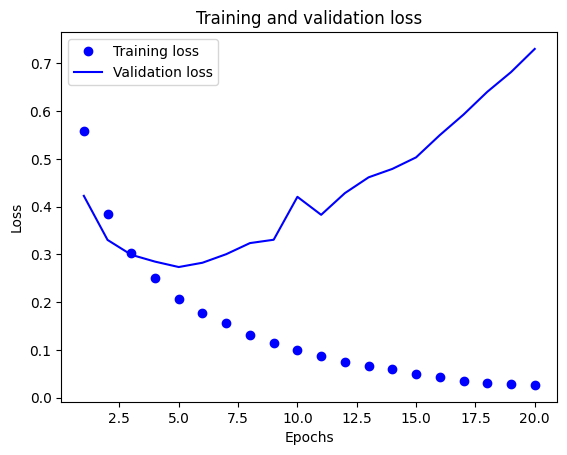

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**رسم دقت `accuracy` مربوط به آموزش و اعتبارسنجی**

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- همانطور که مشاهده می‌کنید در طول دوره دقت آموزش بیشتر ولی دقت اعتبارسنجی کمتر می‌شود که این همان `overfitting` است. 
  - برای جلوگیری از آن، می‌توانید فرآیند آموزش را پس از چهار دوره متوقف کنید. 
  - سایر تکنیک‌ها در فصل ۵ بررسی خواهند شد.
- 

**بازآموزشی مدل از ابتدا**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=256)
results = model.evaluate(x_test, y_test)

In [ ]:
results

- این رویکرد نسبتا ساده به دقت ٪88 درصد می‌رسد. 
- با رویکردهای پیشرفته، باید بتوانید نزدیک به 95٪ برسید.

### استفاده از یک مدل آموزش دیده برای ایجاد پیش بینی در داده‌های جدید

In [33]:
model.predict(x_test)

 70/782 [=>............................] - ETA: 1s

2023-04-19 15:11:59.802362: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 1ms/step


array([[0.00462034],
       [1.        ],
       [0.07440482],
       ...,
       [0.00137264],
       [0.00192649],
       [0.69055825]], dtype=float32)

- همانطور که می‌بینید، مدل برای برخی از نمونه‌ها (0.99 یا بیشتر، یا 0.01 یا کمتر) مطمئن است، اما برای برخی دیگر (0.6، 0.4) اطمینان کمتری دارد.

### تمرین بیشتر
- سعی کنید روی پارامترهای مهم مانند تعداد لایه، تعداد واحد در هر لایه، توابع خطا و سایر توابع فعال‌ساز آزمون‌هایی انجام دهید و دقت را در هر مورد گزارش کنید.

### جمع‌بندی
- شما معمولاً باید کمی پیش پردازش روی داده‌های خام خود انجام دهید تا بتوانید آنها را - به عنوان تنسور - به یک شبکه عصبی تغذیه کنید. 
- دنباله ای از کلمات را می‌توان به عنوان بردارهای دودویی رمزگذاری کرد، اما گزینه‌های رمزگذاری دیگری نیز وجود دارد.
- پشته‌های لایه‌های متراکم با فعال‌سازی‌های relu می‌توانند طیف وسیعی از مسائل (از جمله طبقه‌بندی احساسات) را حل کنند و احتمالاً اغلب از آنها استفاده خواهید کرد.
در یک مسئله طبقه‌بندی باینری (دو کلاس خروجی)، مدل شما باید با یک لایه متراکم با یک واحد و یک فعال‌سازی سیگموئید خاتمه یابد: خروجی مدل شما باید یک اسکالر بین 0 و 1 باشد که یک احتمال را کد می‌کند.
- با چنین خروجی سیگموئیدی اسکالر در مسئله طبقه بندی باینری، تابع ضرری که باید استفاده کنید binary_crossentropy است.
به طور کلی برای هر مسئله‌ای که دارید بهینه ساز `rmsprop`  انتخاب خوبی است.
- شبکه‌های عصبی همان‌طور که به مرور در یادگیری داده‌های آموزشی خود بهتر می‌شوند، در نهایت شروع `overfitting` می‌کنند و در نهایت نتایج بدتری را در مورد داده‌هایی که قبلاً ندیده‌اند به دست می‌آورند. 
- مطمئن شوید که همیشه عملکرد را روی داده‌هایی که خارج از مجموعه آموزشی هستند نظارت کنید. 

## طبقه بندی اخبار: یک نمونه دسته‌بندی چندکلاسه
- در این بخش، مدلی برای طبقه بندی اخبار رویترز در 46 موضوع جداگانه ایجاد می‌کنیم. 
- از آنجایی که ما کلاس‌های زیادی داریم، این مسئله نمونه‌ای از طبقه‌بندی چند کلاسه است، و از آنجا که هر نقطه داده باید تنها در یک دسته طبقه‌بندی شود، مسئله به طور خاص نمونه‌ای از طبقه‌بندی چند کلاسه تک برچسبی است. 
- اگر هر نقطه داده می‌تواند به چندین دسته (در این مورد، موضوعات) تعلق داشته باشد، با یک مسئله طبقه بندی چند کلاسه چند برچسبی (`multilabel multiclass classification`) مواجه خواهیم شد .
  

### مجموعه داده‌ی رویترز `Reuters`

- شما با مجموعه داده رویترز کار خواهید کرد ، مجموعه ای از متن‌های خبری کوتاه و موضوعات آنها، که توسط رویترز در سال 1986 منتشر شد. 
- این مجموعه داده اسباب بازی ساده و پرکاربرد برای طبقه بندی متن است. 
- 46 موضوع مختلف وجود دارد. 
- برخی از موضوعات بیش از سایرین ارائه شده است، اما هر موضوع حداقل 10 مثال در مجموعه آموزشی دارد.
مانند IMDB و MNIST، مجموعه داده رویترز هم به عنوان بخشی از Keras ارائه می‌شود. 

**بارگزاری مجموعه داده**

In [3]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2023-04-29 14:15:55.390470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 14:15:55.780593: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib64/::/lib/:/envs/both/lib/
2023-04-29 14:15:55.780608: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-29 14:15:55.852945: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-2

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/reuters.npz: 403 -- Forbidden

In [ ]:
len(train_data)

In [ ]:
len(test_data)

- مانند بررسی‌های IMDB، هر نمونه لیستی از اعداد صحیح (شاخص‌های کلمه) است:

In [ ]:
train_data[10]

**رمزگشایی داده‌ها به متن text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

- برچسب مرتبط با یک مثال یک عدد صحیح بین 0 و 45 است - یک شاخص موضوع:

In [ ]:
train_labels[10]

### آماده سازی داده ها

- ابتدا باید روی داده‌ها پردازش اولیه صورت گیرد تا آماده تحویل به شبکه عصبی شوند.

**کدگذاری خصیصه‌ها**
- داده‌ها را مانند مقال قبلی با `vectorize_sequences` آماده می‌کنیم.

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**گدگذاری برچسب‌ها**
- برای این منظور از `one-hot encoding` استفاده می‌کنیم که به آن رمزگذاری طبقه‌ای `categorical encoding` هم گفته می‌شود.
- در این روش برداری با طول تعداد برچسب‌ها در نظر گرفته می‌شود که همه مقادیر به جز یکی (با اندیس برچسب مورد نظر) برابر صفر است.

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

- البته خود `keras` هم این تابع را به صورت آماده دارد.

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### ساخت مدل

- در اینجا برخلاف مسئله قبلی ۴۶ خروجی داریم
- فضای مسئله بزرگ  است.
- در پشته‌ای از لایه‌های متراکم مانند لایه‌هایی که استفاده می‌کردیم، هر لایه فقط می‌تواند به اطلاعات موجود در خروجی لایه قبلی دسترسی داشته باشد. 
- اگر یک لایه برخی از اطلاعات مربوط به مسئله طبقه بندی را حذف کند، این اطلاعات هرگز توسط لایه‌های بعدی قابل بازیابی نیستند: هر لایه به طور بالقوه می‌تواند به یک گلوگاه اطلاعاتی تبدیل شود. 
- در مثال قبلی، ما از لایه‌های میانی 16 بعدی استفاده کردیم، اما فضای 16 بعدی ممکن است برای یادگیری جدا کردن 46 کلاس مختلف بسیار محدود باشد: چنین لایه‌های کوچکی ممکن است به عنوان گلوگاه اطلاعات عمل کنند و به طور دائم اطلاعات مرتبط را حذف کنند.
- به همین دلیل از لایه‌هایی با تعداد 64 واحد استفاده می‌کنیم.


**تعریف مدل**

In [36]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**کامپایل مدل**
- ابتدا مدل را با یک لایه متراکم به اندازه 46 پایان می‌دهیم. 
- این بدان معناست که برای هر نمونه ورودی، شبکه یک بردار 46 بعدی را خروجی می‌دهد. 
- هر ورودی در این بردار (هر بعد) یک کلاس خروجی متفاوت را رمزگذاری می‌کند.
- آخرین لایه از یک فعال سازی softmax استفاده می‌کند  که یک مدل یک توزیع احتمال را روی 46 کلاس خروجی مختلف ارائه می‌کند
	- برای هر نمونه ورودی، مدل یک بردار خروجی 46 بعدی تولید می‌کند، که در آن خروجی[i] احتمال تعلق نمونه به کلاس i است. 
	- جمع این امتیازها برابر 1 می‌شود.
- بهترین تابع ضرر برای استفاده در این مورد `categorical_crossentropy` است.  

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### اعتبارسنجی رویکرد شما


**کنارگذاشتن مجموعه اعتبار سنجی**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**آموزش مدل**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

**ترسیم مقادیر خطا مربوط به آموزش و اعتبارسنجی**

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**ترسیم مقادیر دقت مربوط به آموزش و اعتبارسنجی**

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- دقت روش به حدود ۸۰٪ می‌رسد.



**بازآموزی مدل از ابتدا**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

- در حالی که دقت (تجربی) یک طبقه‌بند تصادفی برای این مثال حدود ۱۹٪ خواهد بود. 
  - بررسی تئوری شود.

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

### پیش‌بینی بر روی داده‌های جدید

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

In [ ]:
np.sum(predictions[0])

- اندیس خروجی با بیشترین مقدار، کلاس انتخاب شده نهایی است.

In [ ]:
np.argmax(predictions[0])

### روشی متفاوت برای رسیدگی به برچسب‌ها و خطا

- با توجه به اینکه برچسب‌ها عددی هستند می‌توانیم از `sparse_categorical_crossentropy` استفاده کنیم.
-  

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### اهمیت داشتن لایه‌های میانی به اندازه کافی بزرگ

-  قبلاً اشاره کردیم که چون خروجی‌های نهایی 46 بعدی هستند، باید از لایه‌های میانی با تعداد کمتر از 46 واحد اجتناب کنید. 
- حالا بیایید ببینیم چه اتفاقی می‌افتد وقتی یک گلوگاه اطلاعاتی را با داشتن لایه‌های میانی که به طور قابل توجهی کمتر از ۴۶ بعدی هستند معرفی می‌کنیم: به عنوان مثال، ۴ بعدی.
  
**ساخت مدلی حاوی گلوگاه اطلاعاتی**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

- در این حالت دقت به ۷۱٪ می‌رسد.
- این افت بیشتر به این دلیل است که ما سعی می‌کنیم اطلاعات زیادی را (اطلاعات کافی برای بازیابی ابرصفحه‌های جداسازی 46 کلاس) در یک فضای میانی که ابعاد بسیار پایینی دارد، فشرده کنیم. 
  

### آزمایش‌های بیشتر
- سعی کنید روی تعداد لایه‌ها و تعداد واحد‌ها آزمایش‌های بیشتری انجام دهید.

  
### جمع‌بندی
-  اگر می‌خواهید نقاط داده را بین N کلاس‌ها طبقه‌بندی کنید، مدل شما باید با یک لایه متراکم به اندازه N خاتمه یابد.
-  در یک مسئله طبقه‌بندی چند طبقه‌ای تک برچسبی، مدل شما باید با یک فعال‌سازی softmax خاتمه یابد تا توزیع احتمال را بر روی N کلاس‌های خروجی تولید کند.
- در چنین مواردی باید از `categorical_crossentropy` استفاده کنید تا فاصله بین توزیع‌های احتمال خروجی توسط مدل و توزیع واقعی اهداف را به حداقل برساند.
-  دو روش برای کدگذاری برچسب‌ها در طبقه‌بندی چند کلاسه وجود دارد:
   -  رمزگذاری برچسب‌ها از طریق رمزگذاری طبقه بندی شده (همچنین به عنوان رمزگذاری یک داغ شناخته می‌شود) و استفاده از categorical_crossentropy به عنوان تابع ضرر
   -  رمزگذاری برچسب‌ها به عنوان اعداد صحیح و با استفاده از تابع از دست دادن sparse_categorical_crossentropy
-  اگر نیاز به طبقه‌بندی داده‌ها به تعداد زیادی دسته دارید، باید از ایجاد گلوگاه‌های اطلاعاتی در مدل خود به دلیل لایه‌های میانی که خیلی کوچک هستند، اجتناب کنید.

## پیش‌بینی قیمت خانه - مثالی از رگرسیون
- یکی از انواع رایج مسائل یادگیری ماشین، رگرسیون است که شامل پیش‌بینی یک مقدار پیوسته به جای یک برچسب مجزا است: 
  - پیش‌بینی دمای فردا، 
  - پیش‌بینی زمانی که یک پروژه نرم‌افزاری با توجه به مشخصات آن تکمیل می‌شود. 

**تذکر:** رگرسیون و الگوریتم رگرسیون لجستیک را با هم اشتباه نگیرید، زیرا الگوریتم رگرسیون لجستیک یک الکوریتم دسته‌بندی هست.

### مجموعه داده‌ی `Boston Housing Price`
- در این بخش، ما سعی خواهیم کرد قیمت متوسط خانه‌ها را در یک حومه بوستون در اواسط دهه 1970، با توجه به داده‌های مربوط به حومه در آن زمان، مانند نرخ جرم، نرخ مالیات بر دارایی محلی، و غیره پیش بینی کنیم. 
- بر. 
- مجموعه داده ای که ما استفاده خواهیم کرد تفاوت جالبی با دو مثال قبلی دارد. 
- نقاط داده نسبتا کمی دارد: فقط 506، بین 404 نمونه آموزشی و 102 نمونه آزمایشی تقسیم شده است. 
- و هر ویژگی در داده‌های ورودی (مثلاً میزان جرم و جنایت) مقیاس متفاوتی دارد. 
- به عنوان مثال، برخی از مقادیر نسبت‌هایی هستند که مقادیر بین 0 و 1 را می‌گیرند، برخی دیگر مقادیر بین 1 تا 12، برخی دیگر بین 0 تا 100 و غیره.



**بارگذاری مجموعه داده**

In [4]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 3us/step


In [5]:
train_data.shape

(404, 13)

In [6]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
test_data.shape

(102, 13)

- هدف، ارزش متوسط خانه‌ها بر حسب هزار دلار است:

In [8]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [14]:
import numpy as np
a = [1,5,3,10]
an = np.array(a)
print(an.shape)
print(f'mu={np.mean(an)}')
print(f'std={np.std(an)}')
mu = np.mean(an)
std = np.sqrt(np.sum((an-mu)**2)/an.shape[0])
print(std)

(4,)
mu=4.75
std=3.344772040064913
3.344772040064913


### آماده‌سازی داده‌ها

- مقادیر متفاوت خصیصه‌ها می‌تواند در فرآیند آموزش ایجاد مشکل کند. 
- به عنوان یک پیش‌پردازش رایج ابتدا داده‌ها را نرمال سازی می‌کنیم.


**نرمال‌سازی داده‌ها**

In [15]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

- **تذکر:** توجه داشته باشید که مقادیر استفاده شده برای نرمال سازی داده‌های آزمون با استفاده از داده‌های آموزشی محاسبه می‌شوند. 

### ساخت مدل

- با توجه به اینکه داده‌های آموزشی کم هستند امکان `overfitting‍` وجود دارد. بنابراین باید از مدل ساده‌تری استفاده کرد که امکان حفظ کردن داده‌های ورودی از مدل گرفته شود.
  


**تعریف مدل**

- مدل با یک واحد و بدون فعال سازی به پایان می‌رسد (این یک لایه خطی خواهد بود). 
- این یک تنظیم معمولی برای رگرسیون اسکالر است (رگرسیونی که در آن شما سعی می‌کنید یک مقدار پیوسته را پیش‌بینی کنید). 
- اعمال یک تابع فعال سازی محدوده ای را که خروجی می‌تواند بگیرد محدود می‌کند. 
- برای مثال، اگر یک تابع فعال‌سازی سیگموید را در آخرین لایه اعمال کنید، مدل فقط می‌تواند مقادیر بین 0 و 1 را پیش‌بینی کند. 
- در اینجا، چون آخرین لایه کاملاً خطی است، مدل آزاد است تا پیش‌بینی مقادیر را در هر محدوده‌ای بیاموزد. 
- توجه داشته باشید که ما مدل را با تابع ضرر mse- میانگین مربعات خطا ، مجذور تفاوت بین پیش بینی‌ها و اهداف کامپایل می‌کنیم. 
- این یک تابع از دست دادن به طور گسترده ای برای مسائل رگرسیون استفاده می‌شود.
- همچنین یک معیار جدید را در طول آموزش زیر نظر داریم: میانگین خطای مطلق (MAE). 
- این مقدار مطلق تفاوت بین پیش بینی‌ها و اهداف است. 
- به عنوان مثال، MAE برابر 0.5 در این مسئله به این معنی است که پیش بینی‌های شما به طور متوسط 500 دلار اختلاف دارد.

In [22]:
import keras
from keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### اعتبارسنجی به روش `K-fold cross-validation`
- برای ارزیابی مدل خود در حالی که به تنظیم پارامترهای آن (مانند تعداد دوره‌های مورد استفاده برای آموزش) ادامه می‌دهیم، می‌توانیم مانند نمونه‌های قبلی داده‌ها را به یک مجموعه آموزشی و یک مجموعه اعتبار سنجی تقسیم کنیم. 
- اما از آنجایی که ما نقاط داده بسیار کمی داریم، مجموعه اعتبارسنجی در نهایت بسیار کوچک خواهد بود (به عنوان مثال، حدود 100 نمونه). 
- در نتیجه، امتیازات اعتبار سنجی ممکن است بسته به اینکه کدام نقاط داده را برای اعتبار سنجی انتخاب کرده ایم و کدام را برای آموزش انتخاب کرده ایم، بسیار تغییر کند: امتیازات اعتبار سنجی ممکن است با توجه به تقسیم اعتبار، واریانس بالایی داشته باشند. 
- این ما را از ارزیابی قابل اعتماد مدل خود باز می‌دارد.
- بهترین روش در چنین شرایطی استفاده از اعتبارسنجی متقاطع `K-fold cross-validation` است.

![K-fold cross-validation](img/04-08.png)


**کد برنامه K-fold validation**

- این شامل تقسیم داده‌های موجود به پارتیشن‌های K (معمولاً K = 4 یا 5)، نمونه‌سازی K مدل‌های یکسان، و آموزش هر یک بر روی پارتیشن‌های K - 1 در حین ارزیابی پارتیشن باقی‌مانده است. 
- سپس امتیاز اعتبارسنجی برای مدل مورد استفاده، میانگین نمرات K اعتبارسنجی به دست آمده است. 
- از نظر کد، این ساده است.

In [24]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [25]:
all_scores

[1.996597409248352, 2.4837870597839355, 2.470710039138794, 2.4397406578063965]

In [26]:
np.mean(all_scores)

2.3477087914943695

- میانگین (2.6) معیاری بسیار قابل اعتمادتر از هر امتیاز منفرد است - این تمام نقطه اعتبار متقاطع K-fold است. 
- در این مورد، ما به طور متوسط 2600 دلار کاهش داریم که با توجه به اینکه قیمت‌ها از 10000 تا 50000 دلار متغیر است قابل توجه است.

** ذخیره گزارش‌های اعتبارسنجی در هر فولد**

- در این قسمت تعداد دوره‌های آموزش را تا ۵۰۰ افزایش می‌دهیم و نتایج را در تاریخچه ذخیره می‌کنیم.

In [28]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**ساختن تاریخچه میانگین نمرات اعتبارسنجی K-fold متوالی**

In [29]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**رسم نتایج**

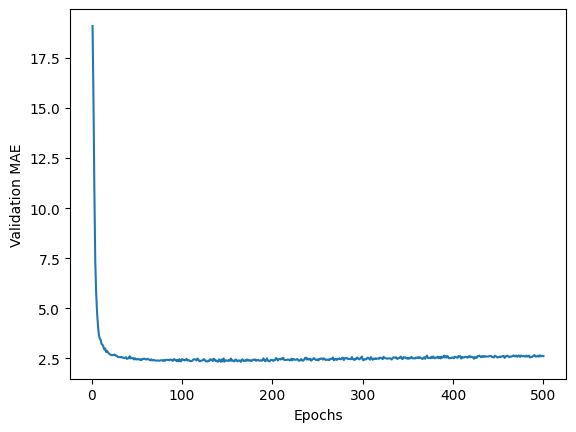

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- ممکن است به دلیل یک مسئله مقیاس‌بندی، خواندن طرح کمی دشوار باشد: اعتبارسنجی MAE برای چند دوره اول به طور چشمگیری بالاتر از مقادیر بعدی است. 
- بیایید 10 نقطه داده اول را که در مقیاسی متفاوت از بقیه منحنی هستند، حذف کنیم.
  
**رسم مجدد با حذف ۱۰ نقطه ابتدایی**

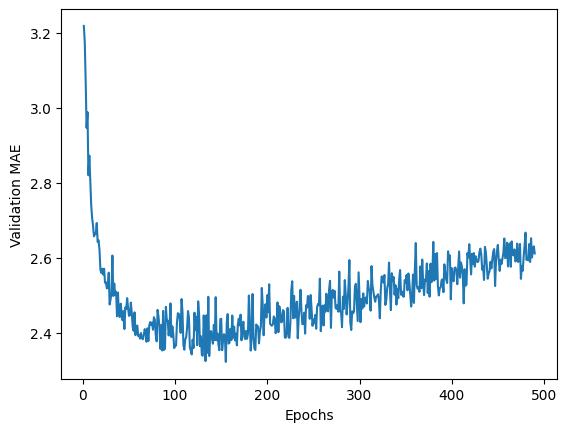

In [32]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

![Validation MAE by epoch, excluding the first 10 data points](img/04-10.png)

- همانطور که در شکل 4.10 مشاهده می‌کنید، اعتبارسنجی MAE پس از 120 تا 140 دوره به طور قابل توجهی بهبود نمی‌یابد (این عدد شامل 10 دوره ای است که ما حذف کردیم). 
- پس از آن نقطه، ما شروع به `overfitting` می‌کنیم.

**آموزش مدل نهایی**

- هنگامی که تنظیم سایر پارامترهای مدل را به پایان رساندید (علاوه بر تعداد دوره ها، می‌توانید اندازه لایه‌های میانی را نیز تنظیم کنید)، می‌توانید یک مدل تولید نهایی را بر روی تمام داده‌های آموزشی، با بهترین پارامترها آموزش دهید. 
- سپس به عملکرد آن در داده‌های آزمایشی نگاه کنید.

In [33]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 14.5665 - mae: 2.5151


In [34]:
test_mae_score

2.5150511264801025

- میانگین خطا حدود 2500 دلار هست.
- این یک پیشرفت است! درست مانند دو کار قبلی، می‌توانید تعداد لایه‌های مدل یا تعداد واحدهای هر لایه را تغییر دهید تا ببینید آیا می‌توانید خطای تست کمتری را حذف کنید.

### ایجاد پیش بینی بر روی داده‌های جدید

In [35]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([8.38829], dtype=float32)

### جمع‌بندی موارد مهم رگرسیون
-  رگرسیون با استفاده از توابع خطای متفاوتی نسبت به دسته‌بندی مدل می‌شود. 
   - میانگین مربعات خطا (MSE) یک تابع خطا است که معمولا برای رگرسیون استفاده می‌شود.
-  به طور مشابه، معیارهای ارزیابی که برای رگرسیون استفاده می‌شود با معیارهایی که برای طبقه بندی استفاده می‌شود متفاوت است. 
   - طبیعتاً مفهوم دقت برای رگرسیون کاربرد ندارد. 
   - یک سنجه رایج برای رگرسیون میانگین خطای مطلق (MAE) است.
-  هنگامی که ویژگی‌های داده‌های ورودی دارای مقادیری در محدوده‌های مختلف هستند، هر ویژگی باید به عنوان یک مرحله پیش پردازش به طور مستقل نرمال‌سازی شود.
-  هنگامی که داده‌های کمی در دسترس است، استفاده از اعتبار سنجی K-fold راهی عالی برای ارزیابی قابل اعتماد یک مدل است.
-  هنگامی که داده‌های آموزشی کمی در دسترس است، ترجیحاً از یک مدل کوچک با چند لایه میانی (معمولاً فقط یک یا دو) استفاده کنید تا از `overfitting` یا همان بیش‌برازش جلوگیری شود.

## خلاصه فصل
-  سه نوع متداول کار یادگیری ماشین روی داده‌های برداری عبارتند از: طبقه بندی باینری، طبقه بندی چند کلاسه و رگرسیون عددی
     - رگرسیون از توابع زیان متفاوت و معیارهای ارزیابی متفاوتی نسبت به طبقه بندی استفاده می‌کند.
-  معمولاً باید داده‌های خام را قبل از وارد کردن آنها به یک شبکه عصبی از قبل پردازش کنید.
-  وقتی داده‌های شما دارای ویژگی‌هایی با محدوده‌های مختلف است، هر ویژگی را به‌عنوان بخشی از پیش‌پردازش مستقل نرمال‌سازی کنید.
-  همانطور که آموزش پیشرفت می‌کند، شبکه‌های عصبی در نهایت شروع به بیش‌برازش می‌کنند و نتایج بدتری را در داده‌هایی که قبلاً دیده نشده بودند به دست می‌آورند.
-  اگر داده‌های آموزشی زیادی ندارید، از یک مدل کوچک با تنها یک یا دو لایه میانی استفاده کنید تا از بیش‌برازش جلوگیری کنید.
-  اگر داده‌های شما به دسته‌های زیادی تقسیم می‌شوند، اگر لایه‌های میانی را خیلی کوچک کنید، ممکن است با گلوگاه‌های اطلاعاتی مواجه شوید.
-  هنگامی که با داده‌های کمی کار می‌کنید، اعتبار سنجی K-fold می‌تواند به ارزیابی قابل اعتماد مدل شما کمک کند.

</div>